<a href="https://colab.research.google.com/github/sadaf21/TECHNOHACKS_EDUTECH/blob/main/EMAIL_SPAM_FILTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
data = pd.read_csv("spam.csv",encoding='latin-1')

In [5]:
data.shape

(5572, 5)

In [6]:
data.head(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data.rename(columns = {'v1':'target','v2':'text'},inplace=True)

In [10]:
data.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [13]:
data.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [14]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
data.duplicated().sum()

403

In [16]:
print("Before removing duplicates:", data.shape)
data.drop_duplicates(keep='first', inplace=True)
print("After removing duplicates:", data.shape)

Before removing duplicates: (5572, 2)
After removing duplicates: (5169, 2)


<Axes: >

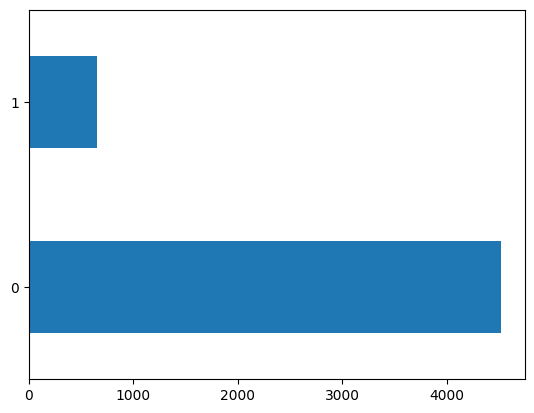

In [17]:
data['target'].value_counts().plot(kind='barh')

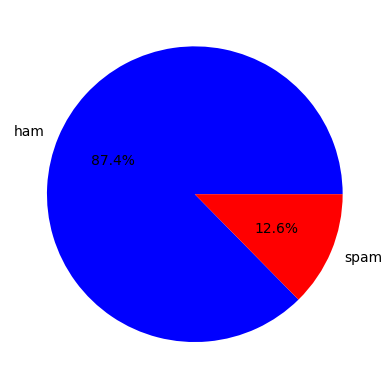

In [18]:
colors = ['blue', 'red']
plt.pie(data['target'].value_counts(),labels=['ham', 'spam'], autopct='%1.1f%%', colors=colors)
plt.show()

In [19]:
import nltk
nltk.download('punkt')
def count_features(text):
  num_characters = len(text)
  num_words = len(nltk.word_tokenize(text))
  num_sentences = len(nltk.sent_tokenize(text))
  return num_characters, num_words, num_sentences
data[['num_characters', 'num_words', 'num_sentences']] = data['text'].apply(lambda x: pd.Series(count_features(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
data.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [21]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
data[data['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
data[data['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


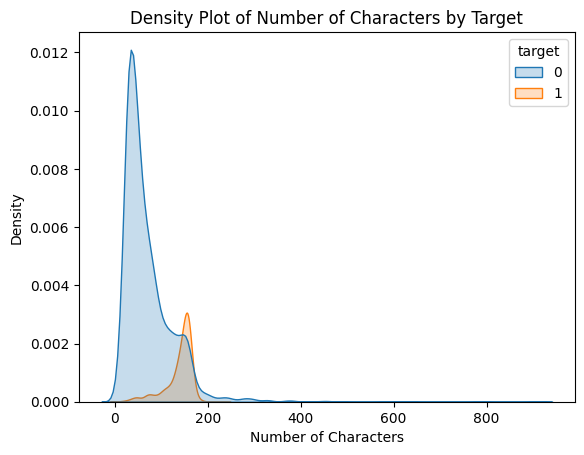

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(data=data, x='num_characters', hue='target', fill=True)
plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.title('Density Plot of Number of Characters by Target')
plt.show()

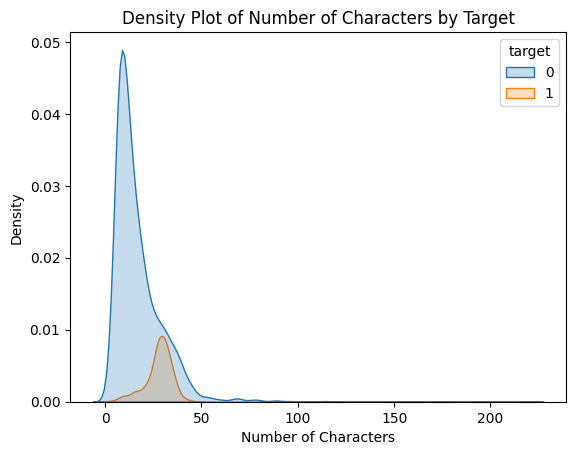

In [25]:
sns.kdeplot(data=data, x='num_words', hue='target', fill=True)
plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.title('Density Plot of Number of Characters by Target')
plt.show()

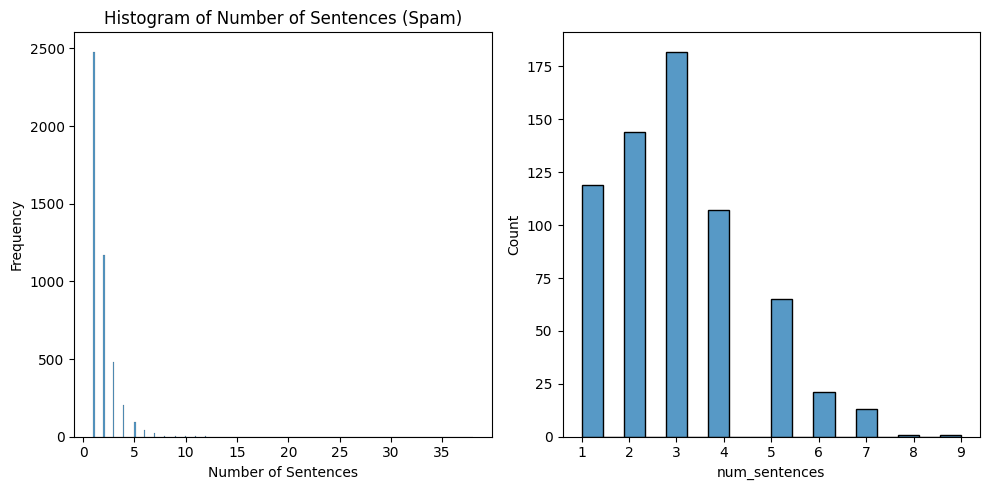

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data[data['target'] == 0]['num_sentences'], ax=axes[0])
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Number of Sentences (ham)')
sns.histplot(data[data['target'] == 1]['num_sentences'], ax=axes[1])
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Number of Sentences (Spam)')
plt.tight_layout()
plt.show()


In [27]:
data.corr()

<ipython-input-27-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


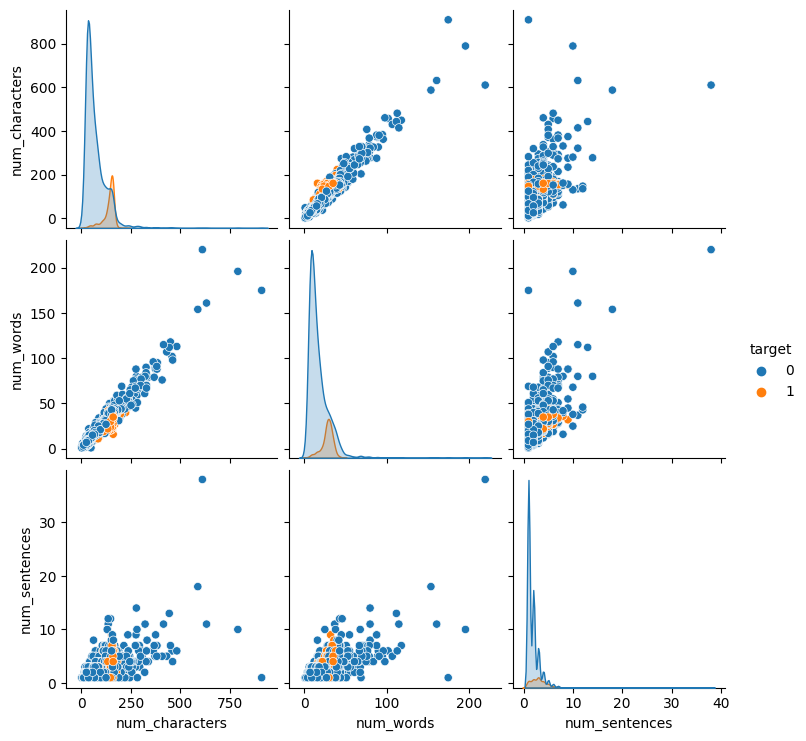

In [28]:
sns.pairplot(data=data, vars=['num_characters', 'num_words', 'num_sentences'], hue='target')
plt.show()